In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


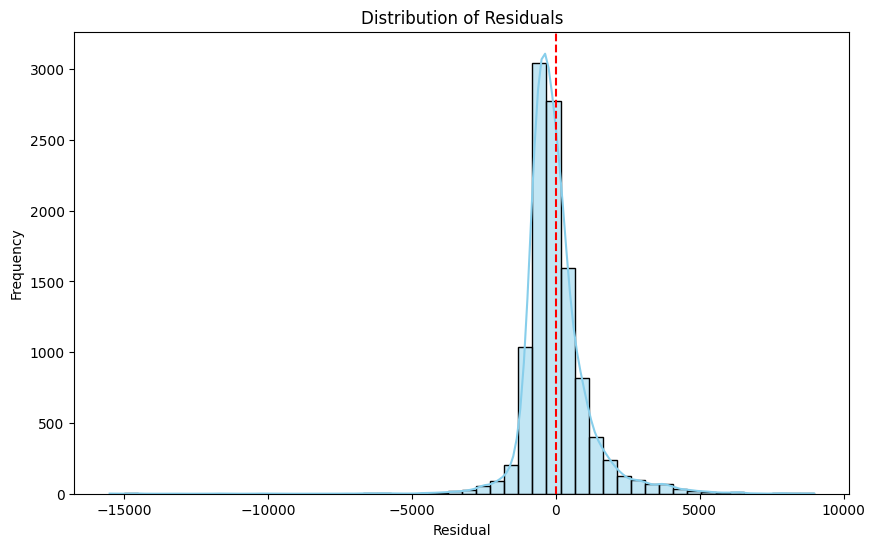

In [2]:
# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Preview the dataset
print(diamonds.head())

# Drop non-numeric and categorical variables or encode them
# Encode categorical features using one-hot encoding
diamonds_encoded = pd.get_dummies(diamonds, columns=['cut', 'color', 'clarity'], drop_first=True)

# Define features (X) and target (y)
X = diamonds_encoded.drop(columns=['price'])
y = diamonds_encoded['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [5]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [6]:
# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# One-hot encode categorical variables
diamonds_encoded = pd.get_dummies(diamonds, columns=['cut', 'color', 'clarity'], drop_first=True)

# Define features (X) and target (y)
X = diamonds_encoded.drop(columns='price')
y = diamonds_encoded['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 1288705.48
Mean Absolute Error (MAE): 737.15
Root Mean Squared Error (RMSE): 1135.21


3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

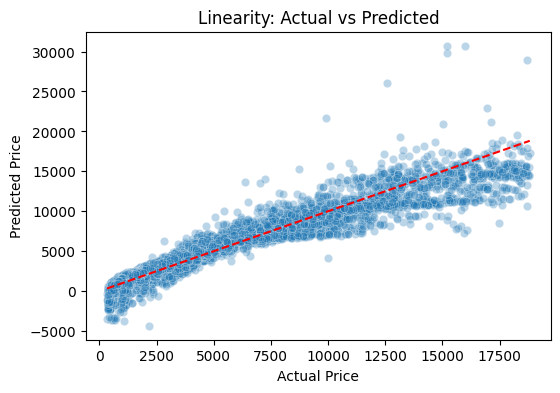

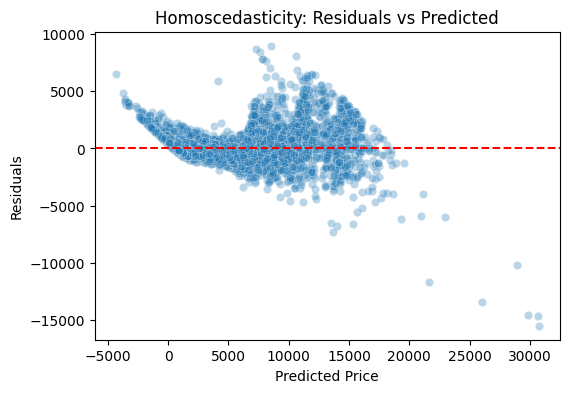

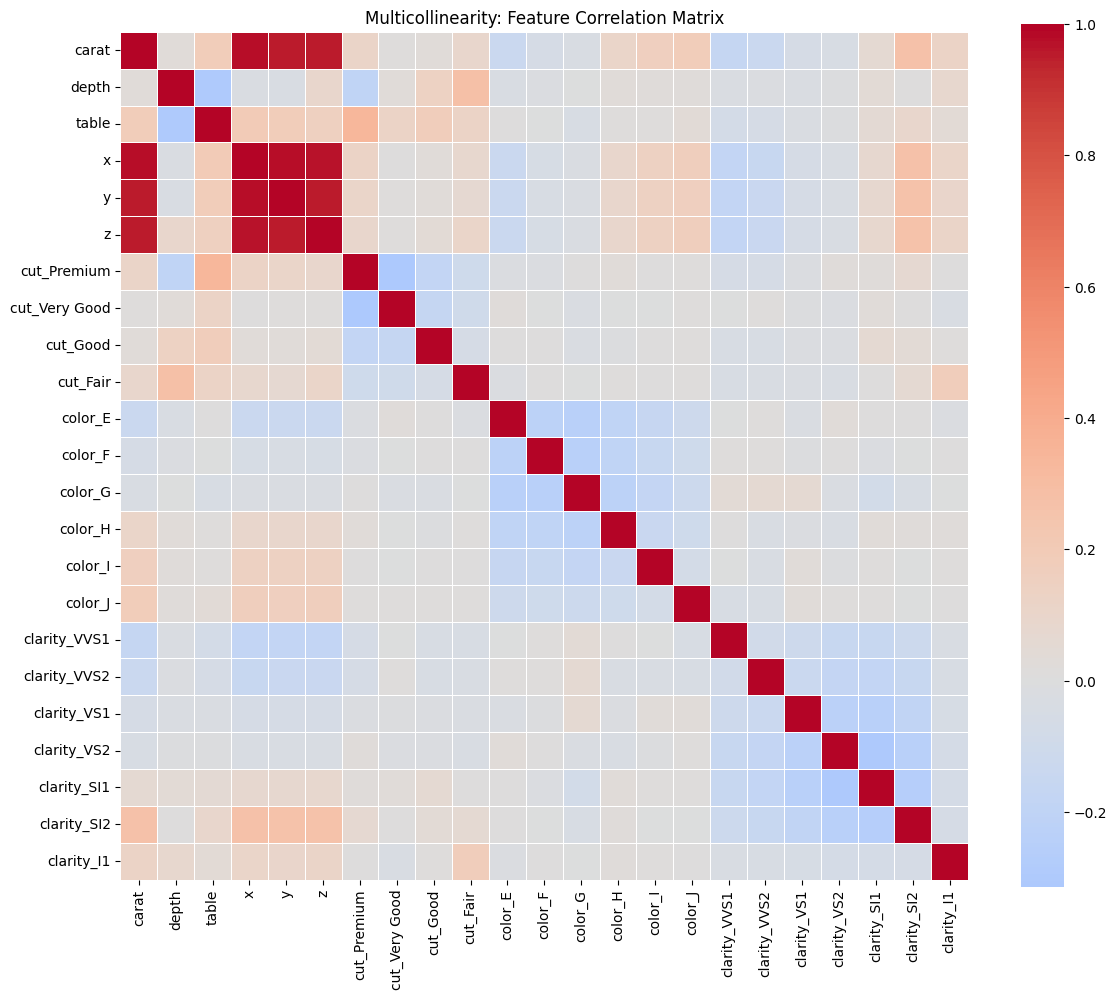

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Encode categorical variables using one-hot encoding
diamonds_encoded = pd.get_dummies(diamonds, columns=['cut', 'color', 'clarity'], drop_first=True)

# Define features and target variable
X = diamonds_encoded.drop(columns='price')
y = diamonds_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# 1. Linearity: Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linearity: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# 2. Homoscedasticity: Residuals vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Homoscedasticity: Residuals vs Predicted")
plt.show()

# 3. Multicollinearity: Correlation Matrix
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Multicollinearity: Feature Correlation Matrix")
plt.tight_layout()
plt.show()


4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models.

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

# Evaluate each model
for name, model in models.items():
    print(f"\n{name}")
    # Create pipeline with scaling and model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_score = cross_val_score(pipeline, X, y, cv=5, scoring='r2').mean()

    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Cross-Validated R^2 Score: {cv_score:.4f}")



Linear Regression
Mean Squared Error: 0.5559
R^2 Score: 0.5758
Cross-Validated R^2 Score: 0.5530

Ridge Regression
Mean Squared Error: 0.5559
R^2 Score: 0.5758
Cross-Validated R^2 Score: 0.5530

Random Forest
Mean Squared Error: 0.2552
R^2 Score: 0.8053
Cross-Validated R^2 Score: 0.6559

Support Vector Regressor
Mean Squared Error: 0.3570
R^2 Score: 0.7276
Cross-Validated R^2 Score: 0.6687


5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.

Coefficient: 0.4193384939381271
Intercept: 0.4445972916907879
R-squared Score: 0.45885918903846656


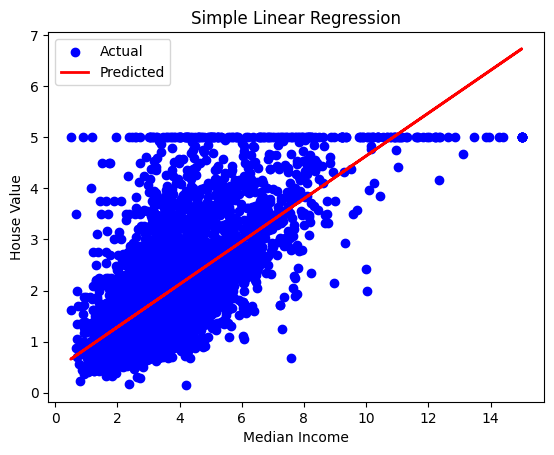

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X = data.data[:, [0]]  # Use only one feature: 'MedInc' (Median Income)
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model parameters
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared Score:", r2_score(y_test, y_pred))

# Optional: Visualize results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results.

Coefficient (slope): 0.10502451738435337
Intercept: 0.9202696135546731
R-squared Score: 0.45661658635167657


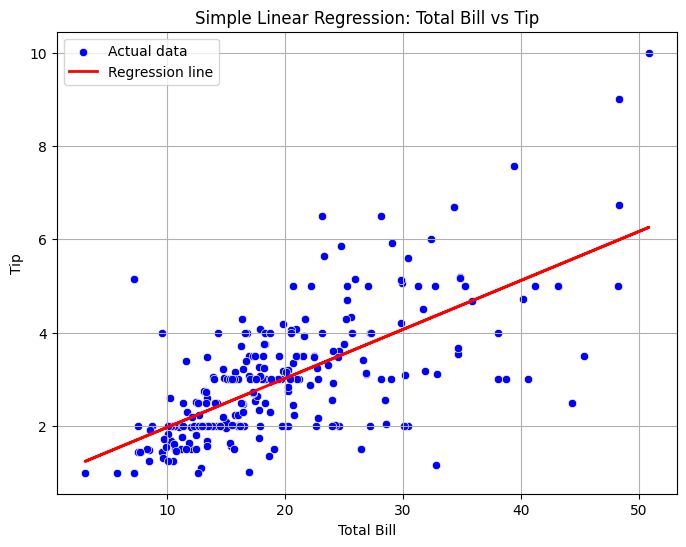

In [10]:
# Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Extract relevant features
X = tips[['total_bill']].values  # Predictor
y = tips['tip'].values           # Response

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict tips
y_pred = model.predict(X)

# Print model coefficients
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared Score:", r2_score(y, y_pred))

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, label='Actual data', color='blue')
plt.plot(tips['total_bill'], y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Simple Linear Regression: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.grid(True)
plt.show()

7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.

Coefficient (slope): 2.7993236574802762
Intercept: 4.142913319458566


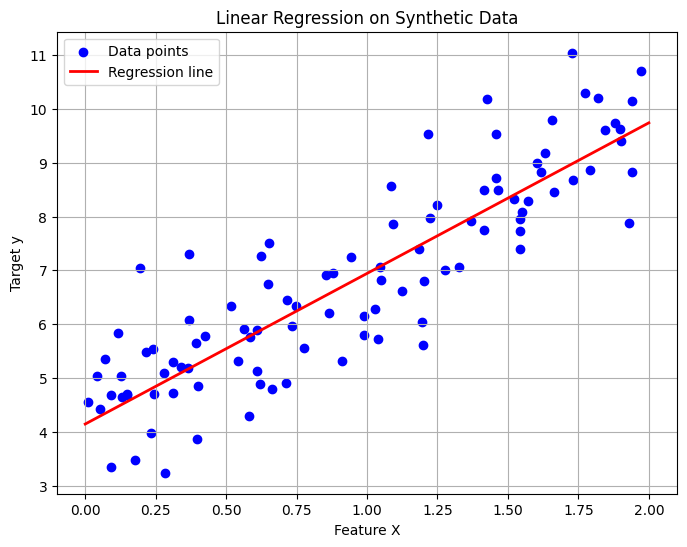

In [11]:


# 1. Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# 2. Split data into training and test sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict values
X_line = np.linspace(0, 2, 100).reshape(100, 1)
y_line = model.predict(X_line)

# 5. Print model parameters
print("Coefficient (slope):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

# 6. Plot data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression line')
plt.title("Linear Regression on Synthetic Data")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()


8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [12]:
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

# 1. Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 5 + 2 * X + np.random.randn(100, 1)

# 2. Train linear regression model
model = LinearRegression()
model.fit(X, y)

# 3. Print model parameters (optional)
print("Model trained.")
print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

# 4. Pickle the model and save to file
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been pickled and saved to 'linear_model.pkl'")


Model trained.
Coefficient: 1.9684675107010197
Intercept: 5.222151077447228
Model has been pickled and saved to 'linear_model.pkl'


In [13]:
with open('linear_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use it to predict
predicted = loaded_model.predict([[1.5]])
print("Prediction for input 1.5:", predicted[0][0])


Prediction for input 1.5: 8.174852343498758


9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

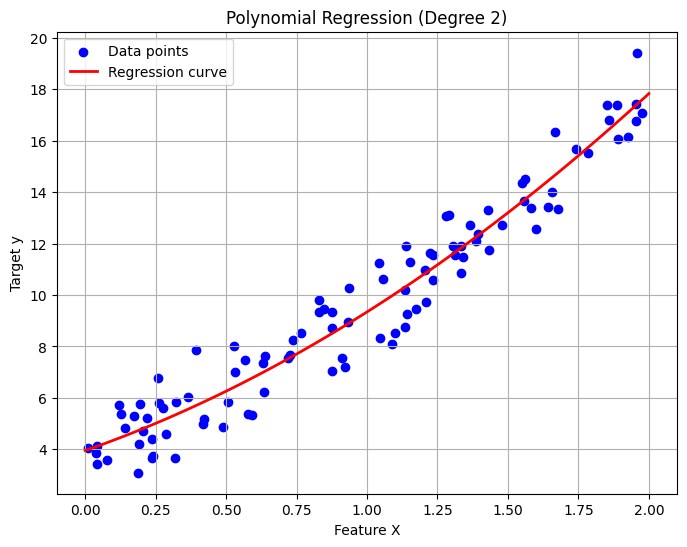

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Generate synthetic nonlinear data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)  # Quadratic with noise

# 2. Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 3. Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# 4. Generate smooth curve for plotting
X_curve = np.linspace(0, 2, 100).reshape(100, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

# 5. Plot data points and regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_curve, y_curve, color='red', linewidth=2, label='Regression curve')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()


10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Generate random synthetic data
np.random.seed(42)
X = 10 * np.random.rand(50, 1)  # 50 samples, values from 0 to 10
y = 2.5 * X + 7 + np.random.randn(50, 1)  # y = 2.5x + 7 + noise

# 2. Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# 3. Print model parameters
print("Coefficient (slope):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])


Coefficient (slope): 2.477656600385311
Intercept: 7.096689274468881


11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

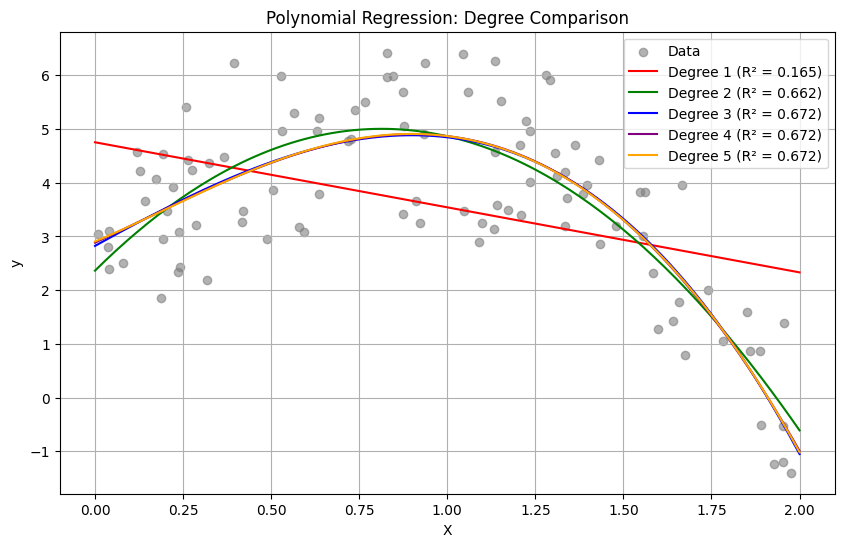

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# 1. Generate synthetic nonlinear data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 + 2 * X + X**2 - 1.5 * X**3 + np.random.randn(100, 1)  # Cubic pattern with noise

# 2. Degrees to evaluate
degrees = [1, 2, 3, 4, 5]
colors = ['red', 'green', 'blue', 'purple', 'orange']

# 3. Create smooth X values for plotting curves
X_curve = np.linspace(0, 2, 200).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.6, label='Data')

# 4. Fit and plot polynomial models
for degree, color in zip(degrees, colors):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict on smooth line for curve
    X_curve_poly = poly.transform(X_curve)
    y_curve = model.predict(X_curve_poly)

    # Evaluate
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    # Plot
    plt.plot(X_curve, y_curve, color=color, label=f'Degree {degree} (R² = {r2:.3f})')

plt.title("Polynomial Regression: Degree Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


12. Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 1. Generate synthetic data
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X = np.hstack((X1, X2))  # Combine features
y = 4 + 2 * X1 + 3 * X2 + np.random.randn(100, 1)  # Linear combination + noise

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# 5. Print model details
print("Coefficients:", model.coef_[0])     # One for each feature
print("Intercept:", model.intercept_[0])
print("R-squared Score:", r2)


Coefficients: [1.87501104 3.26239125]
Intercept: 3.793257488973518
R-squared Score: 0.9372569685960334


13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.

Coefficient (slope): 2.4873870042804076
Intercept: 4.222151077447227


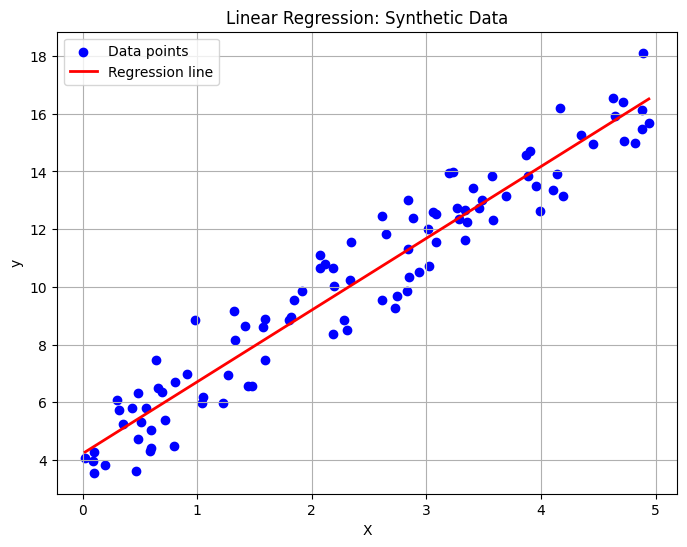

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Generate synthetic data
np.random.seed(0)
X = 5 * np.random.rand(100, 1)
y = 2.5 * X + 4 + np.random.randn(100, 1)  # y = 2.5x + 4 + noise

# 2. Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# 3. Predict values for the regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

# 4. Print model parameters
print("Coefficient (slope):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

# 5. Plot data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression line')
plt.title("Linear Regression: Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [19]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate synthetic dataset with multicollinearity
np.random.seed(42)
X1 = np.random.rand(100)
X2 = 2 * X1 + np.random.normal(0, 0.1, 100)  # Highly correlated with X1
X3 = np.random.rand(100)
X4 = 3 * X3 + np.random.normal(0, 0.1, 100)  # Highly correlated with X3

# Combine into DataFrame
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'X4': X4
})

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)


  Feature         VIF
0      X1  154.624373
1      X2  158.052990
2      X3  429.889794
3      X4  424.444523


15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.

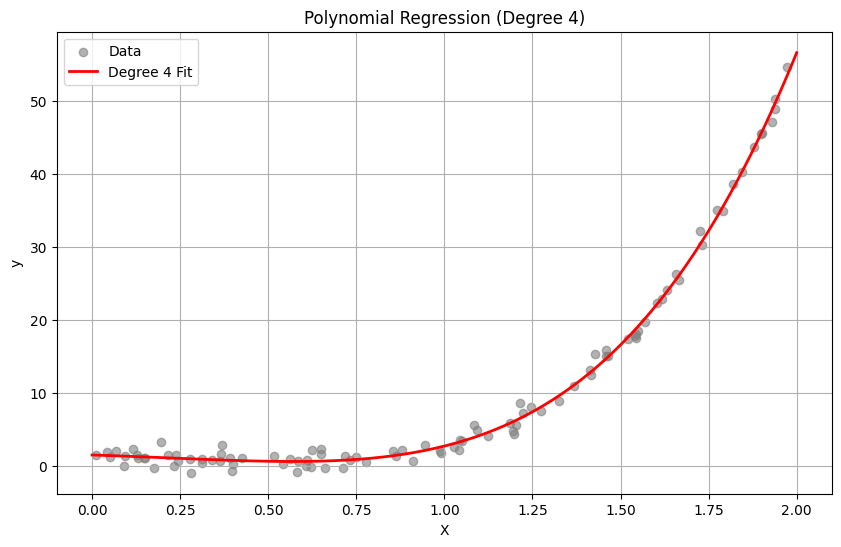

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Generate synthetic data (degree 4 relationship)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 1 - 2*X + 3*X**2 - 4*X**3 + 5*X**4 + np.random.randn(100, 1)  # 4th-degree polynomial + noise

# 2. Transform features to polynomial (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# 3. Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# 4. Create smooth curve data
X_curve = np.linspace(0, 2, 200).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

# 5. Plot data and regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.6, label='Data')
plt.plot(X_curve, y_curve, color='red', linewidth=2, label='Degree 4 Fit')
plt.title("Polynomial Regression (Degree 4)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [21]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Generate synthetic data with multiple features
np.random.seed(0)
X1 = np.random.rand(100, 1)
X2 = 2 * np.random.rand(100, 1)
X3 = 3 * np.random.rand(100, 1)
X = np.hstack((X1, X2, X3))  # 3 features
y = 4 + 3*X1 + 2*X2 + X3 + np.random.randn(100, 1)  # y = 4 + 3X1 + 2X2 + X3 + noise

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Standardization
    ('regressor', LinearRegression())        # Multiple Linear Regression
])

# 4. Fit model and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 5. R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.749578967431583


17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.

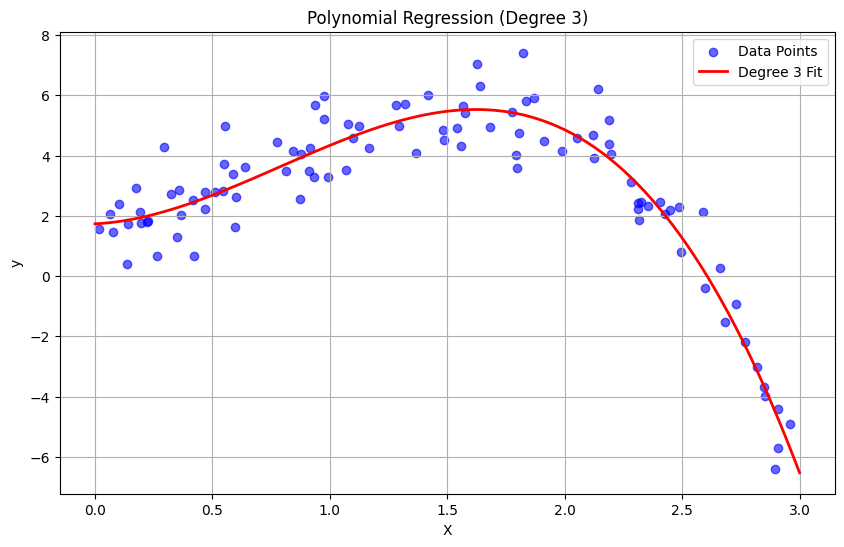

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Generate synthetic data with cubic pattern
np.random.seed(42)
X = 3 * np.random.rand(100, 1)
y = 1 + 2 * X + 3 * X**2 - 1.5 * X**3 + np.random.randn(100, 1)  # Cubic pattern + noise

# 2. Polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# 3. Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# 4. Predict on a smooth range for curve
X_curve = np.linspace(0, 3, 200).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

# 5. Plot original data and regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(X_curve, y_curve, color='red', linewidth=2, label='Degree 3 Fit')
plt.title("Polynomial Regression (Degree 3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 5)  # 5 features

# True coefficients: [2, -1, 0.5, 3, 1.2]
y = 2*X[:, 0] - 1*X[:, 1] + 0.5*X[:, 2] + 3*X[:, 3] + 1.2*X[:, 4] + np.random.randn(n_samples)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# 5. Print results
print("R-squared Score:", round(r2, 4))
print("Intercept:", round(model.intercept_, 4))
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"  Feature {i+1}: {round(coef, 4)}")


R-squared Score: 0.3797
Intercept: -0.2653
Coefficients:
  Feature 1: 2.1122
  Feature 2: -1.1336
  Feature 3: 0.9011
  Feature 4: 3.3021
  Feature 5: 0.943


19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.

Coefficient (slope): 3.408
Intercept: 2.2151


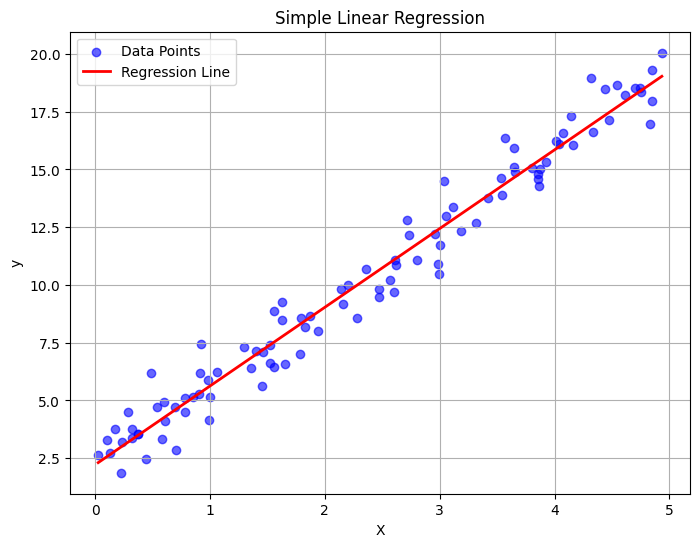

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Generate synthetic linear data
np.random.seed(42)
X = 5 * np.random.rand(100, 1)
y = 3.5 * X + 2 + np.random.randn(100, 1)  # y = 3.5x + 2 + noise

# 2. Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# 3. Predict values for plotting the regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

# 4. Print model parameters
print("Coefficient (slope):", round(model.coef_[0][0], 4))
print("Intercept:", round(model.intercept_[0], 4))

# 5. Plot data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3)  # 100 samples, 3 features

# Define true relationship: y = 4*X1 + 2*X2 + 3*X3 + noise
y = 4*X[:, 0] + 2*X[:, 1] + 3*X[:, 2] + np.random.randn(100)

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Print model evaluation
print("R-squared Score:", round(r2_score(y_test, y_pred), 4))
print("Intercept:", round(model.intercept_, 4))
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"  Feature {i+1}: {round(coef, 4)}")


R-squared Score: 0.5943
Intercept: -0.085
Coefficients:
  Feature 1: 4.1059
  Feature 2: 1.9246
  Feature 3: 3.6861


21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from joblib import dump, load

# 1. Generate synthetic data
np.random.seed(0)
X = 5 * np.random.rand(100, 1)
y = 4 * X.flatten() + 2 + np.random.randn(100)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Serialize the model to a file using joblib
dump(model, 'linear_model.joblib')
print("Model serialized and saved to 'linear_model.joblib'")

# 5. Load (deserialize) the model from file
loaded_model = load('linear_model.joblib')
print("Model loaded from 'linear_model.joblib'")

# 6. Predict using the loaded model
sample = np.array([[2.0]])
prediction = loaded_model.predict(sample)
print(f"Prediction for input {sample[0][0]}: {prediction[0]:.2f}")


Model serialized and saved to 'linear_model.joblib'
Model loaded from 'linear_model.joblib'
Prediction for input 2.0: 10.20


22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [28]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# 1. Load 'tips' dataset
tips = sns.load_dataset('tips')

# 2. Features and target
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]  # include categorical features
y = tips['tip']

# 3. Define column transformer for one-hot encoding
categorical_features = ['sex', 'smoker', 'day', 'time']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # drop='first' to avoid dummy variable trap
    ],
    remainder='passthrough'  # keep non-categorical features
)

# 4. Create pipeline: One-Hot Encoding + Linear Regression
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the model
pipeline.fit(X_train, y_train)

# 7. Predict and evaluate
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

# 8. Output R² score
print("R-squared Score:", round(r2, 4))


R-squared Score: 0.4774


23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
true_coeffs = [3, -2, 1.5, 0, 2.2]
y = X @ true_coeffs + np.random.randn(100) * 0.5  # Add noise

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

# 4. Ridge Regression (with alpha=1.0)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

# 5. Print comparison
print("Linear Regression:")
print("  Coefficients:", np.round(lr.coef_, 4))
print("  R-squared:", round(r2_lr, 4))

print("\nRidge Regression (alpha=1.0):")
print("  Coefficients:", np.round(ridge.coef_, 4))
print("  R-squared:", round(r2_ridge, 4))


Linear Regression:
  Coefficients: [ 2.8265 -2.117   1.824   0.0728  1.9772]
  R-squared: 0.8777

Ridge Regression (alpha=1.0):
  Coefficients: [ 2.4402 -1.8969  1.5219  0.1221  1.733 ]
  R-squared: 0.8505


24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 1. Generate synthetic data
np.random.seed(0)
X = 5 * np.random.rand(100, 3)
y = 3 * X[:, 0] + 2 * X[:, 1] + 4 * X[:, 2] + np.random.randn(100)  # Linear relation + noise

# 2. Initialize model
model = LinearRegression()

# 3. Perform 5-fold cross-validation using R² as the scoring metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# 4. Print results
print(f"Cross-validated R-squared scores: {np.round(scores, 4)}")
print(f"Mean R-squared: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")


Cross-validated R-squared scores: [0.9862 0.986  0.9805 0.9798 0.9935]
Mean R-squared: 0.9852
Standard Deviation: 0.0049


25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Generate synthetic data with a quadratic pattern + noise
np.random.seed(42)
X = 6 * np.random.rand(200, 1) - 3  # Range [-3, 3]
y = 0.5 * X**3 - 2 * X**2 + X + 3 + np.random.randn(200, 1) * 3  # Cubic pattern + noise

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Compare models with different polynomial degrees
print("Degree\tR-squared Score")
for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit linear regression on transformed features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)

    print(f"{degree}\t{r2:.4f}")


Degree	R-squared Score
1	0.4818
2	0.8060
3	0.8600
4	0.8584
5	0.8555
